In [1]:
# Pandas is used for data manipulation
import pandas as pd
# Use numpy to convert to arrays
import numpy as np
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
#import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
#import the SupportVectorMachine
from sklearn.svm import SVC
# sklearn.metrics is used to obtain accuracy, classification report and confusion matrix
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
# metrics is used to measure classification performance
from sklearn import metrics
# import matplotlib.pyplot to create plots and charts
import matplotlib.pyplot as plt

In [2]:
data_set = pd.read_csv('Patient Treatment Classification.csv')
print('Shape of dataset is:', data_set.shape)

Shape of dataset is: (3309, 11)


In [3]:
data_set.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
count,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,38.226111,12.749350,4.544802,8.715533,258.893019,28.230039,33.336476,84.611333,46.644303,0.526745,0.398005
std,5.971943,2.084325,0.784510,4.991299,112.676139,2.696520,1.247055,6.916079,21.874106,0.499360,0.489561
min,13.700000,3.800000,1.480000,1.100000,10.000000,14.900000,26.000000,54.000000,1.000000,0.000000,0.000000
25%,34.300000,11.400000,4.040000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.000000,0.000000
50%,38.700000,12.900000,4.580000,7.600000,257.000000,28.700000,33.400000,85.300000,48.000000,1.000000,0.000000
75%,42.500000,14.200000,5.060000,10.300000,322.000000,29.800000,34.100000,88.800000,64.000000,1.000000,1.000000
max,69.000000,18.900000,7.860000,76.600000,1121.000000,40.800000,38.400000,115.600000,99.000000,1.000000,1.000000


In [4]:
data_set[pd.isnull(data_set).any(axis=1)]

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE


In [5]:
pd.isnull(data_set).head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data_set.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3304    False
3305    False
3306    False
3307    False
3308    False
Length: 3309, dtype: bool

In [7]:
# Labels are the values we want to predict
labels = np.array(data_set['SOURCE'])
# Remove the labels from the features
# axis 1 refers to the columns
data_set= data_set.drop('SOURCE', axis = 1)
# Saving feature names for later use
feature_list = list(data_set.columns)
print(feature_list)

['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX']


In [8]:
data_set = np.array(data_set)

In [9]:
# Split the data into training and testing sets
#x_train, x_test, y_train, y_test
train_dataset, test_dataset, train_labels, test_labels = train_test_split(data_set, labels, test_size = 0.25, random_state = 42)

In [10]:
print('Shape of training dataset:', train_dataset.shape)
print('Number of records selected for training:', train_labels.shape)
print('Shape of testing dataset:', test_dataset.shape)
print('Number of records selected for testing:', test_labels.shape)

Shape of training dataset: (2481, 10)
Number of records selected for training: (2481,)
Shape of testing dataset: (828, 10)
Number of records selected for testing: (828,)


In [11]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training dataset
rf.fit(train_dataset, train_labels);

In [12]:
# Use the forest's predict method on the test dataset
predictions = rf.predict(test_dataset)
# Calculate the absolute errors
errors_rf = abs(predictions - test_labels)
# Print out the mean absolute error
print('Mean Absolute Error for RFC:', round(np.mean(errors_rf), 2), 'degrees.')

Mean Absolute Error for RFC: 0.24 degrees.


In [13]:
# Calculate and display accuracy
accuracy = accuracy_score(test_labels, predictions)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 0.76 %.


In [14]:
classificationReport = classification_report(test_labels, predictions)
print(classificationReport)

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       502
           1       0.75      0.58      0.66       326

    accuracy                           0.76       828
   macro avg       0.76      0.73      0.73       828
weighted avg       0.76      0.76      0.75       828



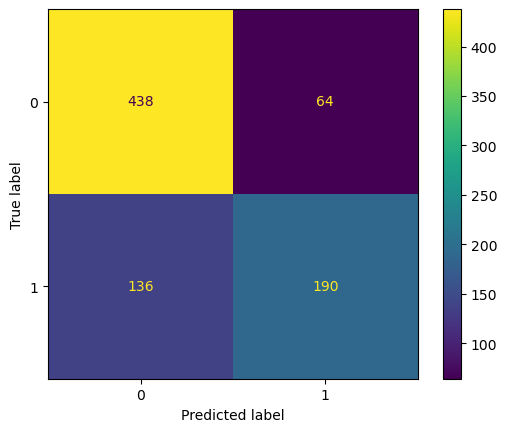

In [15]:
rfc_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(test_labels, predictions))
rfc_cm_display.plot()
plt.show()

In [16]:
train_dataset1, test_dataset1, train_labels1, test_labels1 = train_test_split(data_set, labels, test_size = 0.25)
#Create sVM classifier
clf = SVC(kernel='linear')
# Train the model on training dataset
clf.fit(train_dataset1, train_labels1);

In [17]:
# Use the svm's predict method on the test dataset
predictions_svm = clf.predict(test_dataset1)
# Calculate the absolute errors
errors_clf = abs(predictions_svm - test_labels1)
# Print out the mean absolute error
print('Mean Absolute Error for SVM:', round(np.mean(errors_clf), 2), 'degrees.')

Mean Absolute Error for SVM: 0.29 degrees.


In [18]:
# Calculate and display accuracy
accuracy_svm = accuracy_score(test_labels1, predictions_svm)
print('Accuracy of SVM:', round(accuracy_svm, 2), '%.')

Accuracy of SVM: 0.71 %.


In [19]:
classificationReport_SVM = classification_report(test_labels1, predictions_svm)
print(classificationReport_SVM)

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       502
           1       0.71      0.47      0.56       326

    accuracy                           0.71       828
   macro avg       0.71      0.67      0.68       828
weighted avg       0.71      0.71      0.70       828



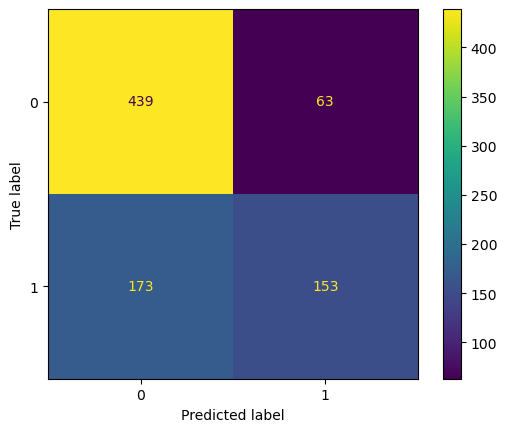

In [20]:
svm_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(test_labels1, predictions_svm))
svm_cm_display.plot()
plt.show()

In [21]:
feature_importances = rf.feature_importances_
feature_importance_ranking = sorted(zip(feature_list, feature_importances), key=lambda x: x[1], reverse=True)
for feature, importance in feature_importance_ranking:
    print(f"{feature}: {importance}")

THROMBOCYTE: 0.21048944398863717
LEUCOCYTE: 0.12322931544192316
HAEMATOCRIT: 0.12018430189254899
ERYTHROCYTE: 0.10860795486250502
AGE: 0.09670089351175502
MCV: 0.08516624474371995
HAEMOGLOBINS: 0.0839488334419092
MCHC: 0.07981025797170145
MCH: 0.07414752076477382
SEX: 0.017715233380526326


In [22]:
important_indices = [feature_list.index('THROMBOCYTE'), feature_list.index('LEUCOCYTE'), feature_list.index('HAEMATOCRIT'), feature_list.index('ERYTHROCYTE')]
train_important = train_dataset[:, important_indices]
test_important = test_dataset[:, important_indices]
rf.fit(train_important, train_labels)
predictions_important = rf.predict(test_important)
errors_important = abs(predictions_important - test_labels)
print('Mean Absolute Error:', round(np.mean(errors_important), 2), 'degrees.')
accuracy_important = accuracy_score(test_labels, predictions_important)
print('Accuracy of important features using RFC:', round(accuracy_important, 2), '%.')

Mean Absolute Error: 0.27 degrees.
Accuracy of important features using RFC: 0.73 %.
